# PDDA Machine Learning Competition   

* __Team Name__: Tachgeeks.
* __Author__: Changqing Yao, Yusuf Falola, Rui Liu
* __Date__: February 1st, 2021

#  Well-log based reservoir property estimation with machine learning
## Table of Contents

* [Step 1: Imports Library and Data](#chapter1)

* [Step 2: Data Cleaning](#chapter2)
    * [2.1. Handle Missing Data](#section_2_1)
    * [2.2. Remove Outlines](#section_2_2)
* [Step 3: Framework...](#chapter2)

* [Step 3: Feature Engineering](#chapter3)

* [Step 4: Machine Learning Model Development](#chapter4)


# Step 1: Imports Library and Data<a class="anchor" id="chapter1"></a>

In [1]:
# import libraries
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
sns.set_theme(style="ticks")

# import sklearn libararies
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor, IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import GridSearchCV

In [2]:
sns.set_style('whitegrid')
warnings.filterwarnings("ignore")

In [3]:
df1 = pd.read_csv('train.csv')
df1.shape

(318967, 17)

# Step 2: Data Cleaning <a class="anchor" id="chapter2"></a>

In [4]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

columns = df1.columns
df1

,WELLNUM,DEPTH,DTC,DTS,BS,CALI,DEN,DENC,GR,NEU,PEF,RDEP,RMED,ROP,PHIF,SW,VSH
0,0,335.16,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,5.33,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00
1,0,335.66,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,5.82,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00
2,0,336.16,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,6.52,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00
3,0,336.66,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,7.23,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00
4,0,337.16,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,9.50,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318962,8,12142.50,64.58,-9999.00,8.50,8.55,2.61,0.03,32.92,0.11,5.21,4.08,3.65,10.43,0.03,1.00,0.27
318963,8,12143.00,66.21,-9999.00,8.50,8.52,2.61,0.02,28.77,0.10,5.23,4.12,3.94,9.47,0.03,1.00,0.23
318964,8,12143.50,67.43,-9999.00,8.50,8.52,2.62,0.03,25.70,0.10,5.34,4.66,4.25,8.96,0.02,1.00,0.21
318965,8,12144.00,66.56,-9999.00,8.50,8.52,2.62,0.03,22.94,0.09,5.35,4.81,4.37,8.81,0.02,1.00,0.18


## 2.1. Handle Missing Data <a class="anchor" id="section_2_1"></a>

> Features 
* WELLNUM - Well number
* DEPTH - Depth, unit in feet
* DTC - Compressional Travel-time, unit in nanosecond per foot
* DTS - Shear Travel-time, unit in nanosecond per foot
* BS - Bit size, unit in inch - remove 
* CAL - Caliper, unit in Inc - remove
* DEN - Density, unit in Gram per cubic centimeter
* DENC - 
* GR - Gamma Ray, unit in API
* NEU - Neutron, unit in dec
* PEF - Photo-electric Factor, unit in Barn
* RDEP - Deep Resisitivity, unit in Ohm per meter
* RMED - Medium Resistivity, unit in Ohm per meter
* ROP - Rate of penetration, unit in meters per hour - remove 

In [5]:
# Replace -9999 with np.nan
df1.replace(['-9999', -9999], np.nan, inplace=True)

> Predict Targets: Reservoir Properties
* PHIF - Porosity, a unit equals to the percentage of pore space in a unit volume of rock.
* SW - Water saturation
* VSH - Shale Volume

In [6]:
df1 = df1[df1['PHIF'].notna()]
df1 = df1[df1['SW'].notna()]
df1 = df1[df1['VSH'].notna()]
df1.shape

(42309, 17)

In [7]:
df1.groupby('WELLNUM').count()

,DEPTH,DTC,DTS,BS,CALI,DEN,DENC,GR,NEU,PEF,RDEP,RMED,ROP,PHIF,SW,VSH
WELLNUM,,,,,,,,,,,,,,,,
0,1880,1880,0,0,1880,1880,0,1880,1880,0,1880,1880,0,1880,1880,1880
1,2872,2794,0,2872,2872,2872,2872,2872,2872,2872,2872,2872,2872,2872,2872,2872
2,2281,2133,2130,2281,2281,2281,2281,2281,2281,2281,2281,2281,2204,2281,2281,2281
3,2105,1954,1877,2105,2105,2105,2105,2105,2105,2105,2105,2105,2105,2105,2105,2105
4,8422,0,0,8422,8422,8422,8422,8422,8422,8422,8399,8422,8422,8422,8422,8422
5,1533,1409,1407,1533,1533,1533,1533,1533,1533,1533,1533,1533,1533,1533,1533,1533
6,13933,0,0,13933,13933,13933,13933,13933,13933,13933,13722,13933,13913,13933,13933,13933
7,2017,1878,1784,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017
8,7266,7266,0,7266,7266,7266,7266,7266,7263,7266,7266,7266,7266,7266,7266,7266


In [8]:
well1 = df1.groupby(["WELLNUM"]).get_group((0))
print('Well1:'+ str(well1.shape))
well2 = df1.groupby(["WELLNUM"]).get_group((1))
print('Well2:'+ str(well2.shape))
well3 = df1.groupby(["WELLNUM"]).get_group((2))
print('Well3:'+ str(well3.shape))
well4 = df1.groupby(["WELLNUM"]).get_group((3))
print('Well4:'+ str(well4.shape))
well5 = df1.groupby(["WELLNUM"]).get_group((4))
print('Well5:'+ str(well5.shape))
well6 = df1.groupby(["WELLNUM"]).get_group((5))
print('Well6:'+ str(well6.shape))
well7 = df1.groupby(["WELLNUM"]).get_group((6))
print('Well7:'+ str(well7.shape))
well8 = df1.groupby(["WELLNUM"]).get_group((7))
print('Well8:'+ str(well8.shape))
well9 = df1.groupby(["WELLNUM"]).get_group((8))
print('Well9:'+ str(well9.shape))

Well1:(1880, 17)
Well2:(2872, 17)
Well3:(2281, 17)
Well4:(2105, 17)
Well5:(8422, 17)
Well6:(1533, 17)
Well7:(13933, 17)
Well8:(2017, 17)
Well9:(7266, 17)


In [9]:
# Plot logs vs depth
def log_plot(well):  
        plt.subplot(191)
        plt.plot(well['DTC'].values, well['DEPTH'].values,'g')
        plt.title('Compressional Travel-time')
        plt.grid(True)
        plt.gca().invert_yaxis()

        plt.subplot(192)
        plt.plot(well['DTS'].values, well['DEPTH'].values,'b')
        plt.title('Shear Travel-time')
        plt.grid(True)
        plt.gca().invert_yaxis()

        plt.subplot(193)
        plt.plot(well['DEN'].values, well['DEPTH'].values,'m')
        plt.title('Density Log')
        plt.grid(True)
        plt.gca().invert_yaxis()

        plt.subplot(194)
        plt.plot(well['DENC'].values, well['DEPTH'].values,'r')
        plt.title('Denisty Log C')
        plt.grid(True)
        plt.gca().invert_yaxis()

        plt.subplot(195)
        plt.plot(well['GR'].values, well['DEPTH'].values,'k')
        plt.title('Gamma Ray')
        plt.grid(True)
        plt.gca().invert_yaxis()

        plt.subplot(196)
        plt.plot(well['NEU'].values, well['DEPTH'].values,'c')
        plt.title('Neutron Log')
        plt.grid(True)
        plt.gca().invert_yaxis()

        plt.subplot(197)
        plt.plot(well['PEF'].values, well['DEPTH'].values,'red')
        plt.title('Photo-electric Factor')
        plt.grid(True)
        plt.gca().invert_yaxis()

        plt.subplot(198)
        plt.plot(well['RDEP'].values, well['DEPTH'].values,'gray')
        plt.title('Deep Resisitivity')
        plt.grid(True)
        plt.gca().invert_yaxis()

        plt.subplot(199)
        plt.plot(well['RMED'].values, well['DEPTH'].values,'b')
        plt.title('Medium Resistivity')
        plt.grid(True)
        plt.gca().invert_yaxis()

        plt.gcf().set_size_inches(30, 10)

        plt.tight_layout()

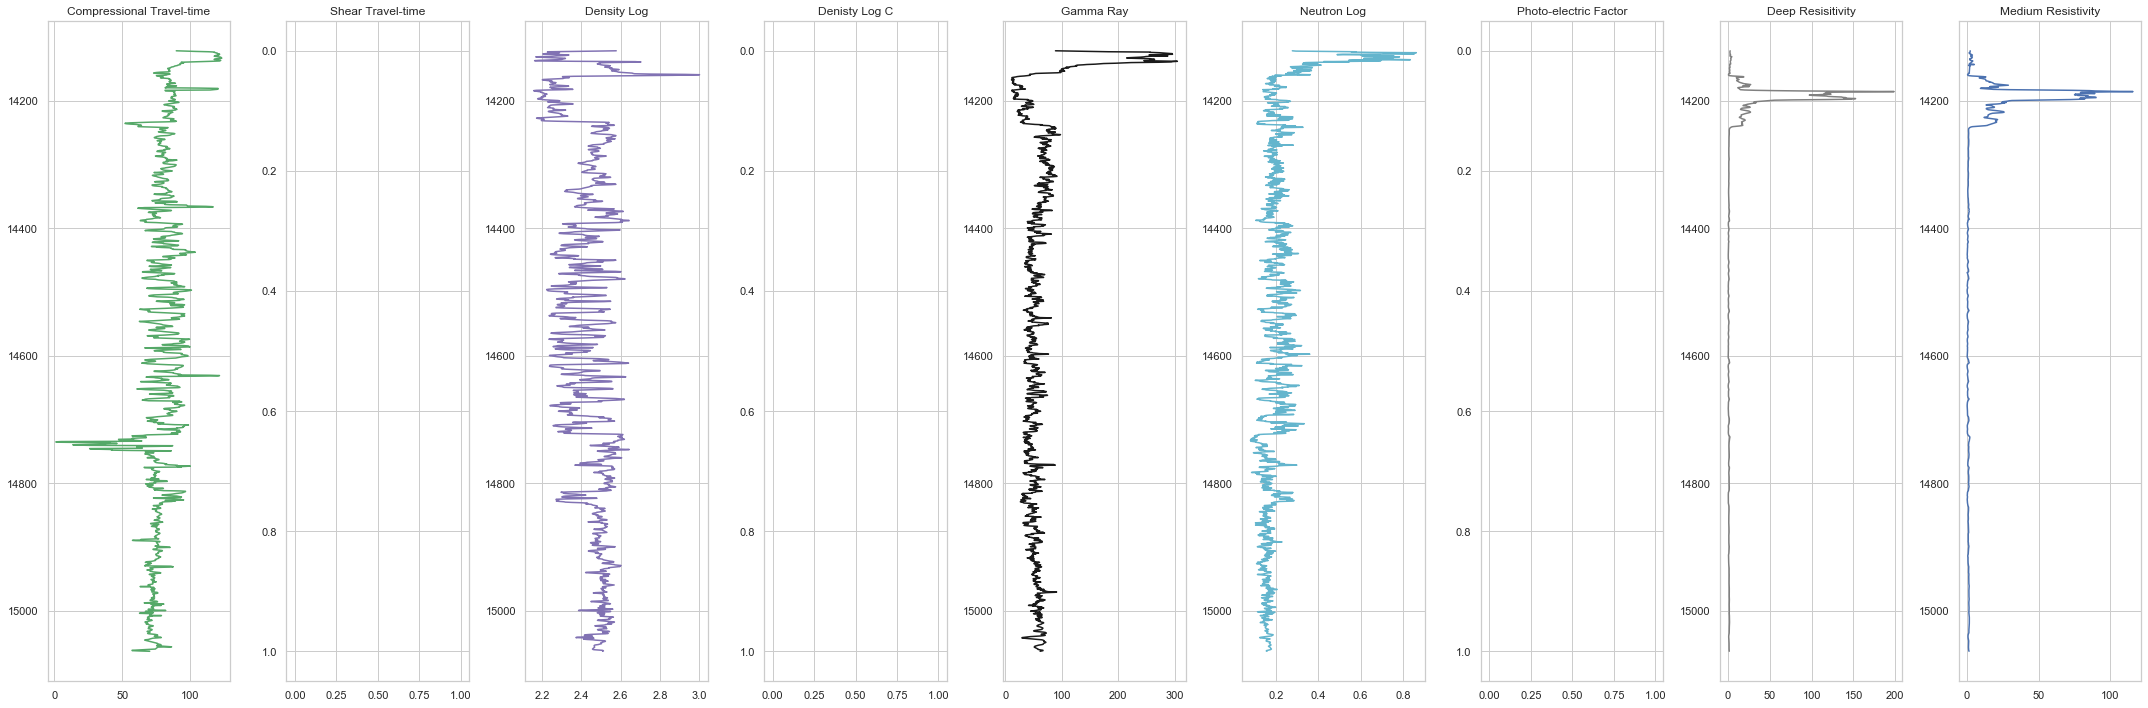

In [10]:
log_plot(well1)

### Fill missing data in DTC

In [11]:
dtcna = df1[df1['DTC'].isna()].index
preddtc = df1.loc[dtcna]
preddtc = preddtc.drop(columns = ['WELLNUM','DEPTH','BS','CALI','ROP','PHIF','SW','VSH'])
preddtc.head()

,DTC,DTS,DEN,DENC,GR,NEU,PEF,RDEP,RMED
63775,nan,nan,2.59,0.05,105.05,0.22,6.54,1.92,1.80
63776,nan,nan,2.59,0.05,107.35,0.22,6.54,1.86,1.73
63777,nan,nan,2.60,0.06,107.73,0.21,6.50,1.82,1.68
63778,nan,nan,2.60,0.06,110.18,0.20,6.43,1.80,1.66
63779,nan,nan,2.60,0.06,111.17,0.20,6.38,1.80,1.70


In [12]:
preddtc.isna().sum()

DTC     22995
DTS     22994
DEN         0
DENC        0
GR          0
NEU         0
PEF         0
RDEP      234
RMED        0
dtype: int64

In [13]:
dtcnotna = df1[df1['DTC'].notna()].index
traindtc = df1.loc[dtcnotna]
traindtc = traindtc.drop(columns = ['WELLNUM','DEPTH','BS','CALI','ROP','PHIF','SW','VSH'])
traindtc.head()

,DTC,DTS,DEN,DENC,GR,NEU,PEF,RDEP,RMED
27573,89.65,nan,2.58,nan,88.86,0.28,nan,2.63,2.49
27574,96.02,nan,2.47,nan,120.89,0.29,nan,2.48,2.47
27575,104.05,nan,2.33,nan,153.52,0.45,nan,2.44,2.37
27576,113.50,nan,2.24,nan,182.85,0.58,nan,2.41,2.41
27577,117.78,nan,2.23,nan,256.20,0.56,nan,2.34,2.41


In [14]:
traindtc.isna().sum()

DTC         0
DTS     12117
DEN         0
DENC     1880
GR          0
NEU         3
PEF      1880
RDEP        0
RMED        0
dtype: int64

In [15]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

grb = GradientBoostingRegressor(n_estimators=300, max_depth = 4)
grb.fit(traindtc[['DEN','GR','RMED']], traindtc['DTC'])
dtc_pred = grb.predict(preddtc[['DEN','GR','RMED']])
print(grb.score(traindtc[['DEN','GR','RMED']], traindtc['DTC']))
df1['DTC'].loc[dtcna] = dtc_pred

0.8294046991795163


### Fill missing data in DTS

In [16]:
dtsna = df1[df1['DTS'].isna()].index
preddts = df1.loc[dtsna]
preddts = preddts.drop(columns = ['WELLNUM','DEPTH','BS','CALI','ROP','PHIF','SW','VSH'])
preddts.head()

,DTC,DTS,DEN,DENC,GR,NEU,PEF,RDEP,RMED
27573,89.65,nan,2.58,nan,88.86,0.28,nan,2.63,2.49
27574,96.02,nan,2.47,nan,120.89,0.29,nan,2.48,2.47
27575,104.05,nan,2.33,nan,153.52,0.45,nan,2.44,2.37
27576,113.50,nan,2.24,nan,182.85,0.58,nan,2.41,2.41
27577,117.78,nan,2.23,nan,256.20,0.56,nan,2.34,2.41


In [17]:
preddts.isna().sum()

DTC         0
DTS     35111
DEN         0
DENC     1880
GR          0
NEU         3
PEF      1880
RDEP      234
RMED        0
dtype: int64

In [18]:
dtsnotna = df1[df1['DTS'].notna()].index
traindts = df1.loc[dtsnotna]
traindts = traindts.drop(columns = ['WELLNUM','DEPTH','BS','CALI','ROP','PHIF','SW','VSH'])
traindts.head()

,DTC,DTS,DEN,DENC,GR,NEU,PEF,RDEP,RMED
96439,89.99,186.79,2.45,0.05,75.17,0.31,0.05,1.59,1.96
96440,90.13,185.71,2.45,0.04,71.38,0.30,0.04,0.90,0.81
96441,90.26,184.65,2.46,0.03,65.64,0.29,0.03,0.85,0.56
96442,90.39,183.58,2.49,0.02,58.90,0.29,0.02,0.87,0.51
96443,90.43,182.97,2.52,0.02,53.51,0.28,0.02,0.80,0.53


In [19]:
grb = GradientBoostingRegressor(n_estimators=300, max_depth = 4)
grb.fit(traindts[['DTC','DEN','GR','RMED']], traindts['DTS'])
dts_pred = grb.predict(preddts[['DTC','DEN','GR','RMED']])
print(grb.score(traindts[['DTC','DEN','GR','RMED']], traindts['DTS']))
df1['DTS'].loc[dtsna] = dts_pred

0.9360925025809381


### Fill missing data in DENC

In [20]:
dencna = df1[df1['DENC'].isna()].index
preddenc = df1.loc[dencna]
preddenc = preddenc.drop(columns = ['WELLNUM','DEPTH','BS','CALI','ROP','PHIF','SW','VSH'])
preddenc.head()

,DTC,DTS,DEN,DENC,GR,NEU,PEF,RDEP,RMED
27573,89.65,132.46,2.58,nan,88.86,0.28,nan,2.63,2.49
27574,96.02,171.53,2.47,nan,120.89,0.29,nan,2.48,2.47
27575,104.05,181.07,2.33,nan,153.52,0.45,nan,2.44,2.37
27576,113.50,191.85,2.24,nan,182.85,0.58,nan,2.41,2.41
27577,117.78,190.71,2.23,nan,256.20,0.56,nan,2.34,2.41


In [21]:
dencnotna = df1[df1['DENC'].notna()].index
traindenc = df1.loc[dencnotna]
traindenc = traindenc.drop(columns = ['WELLNUM','DEPTH','BS','CALI','ROP','PHIF','SW','VSH'])
traindenc.head()

,DTC,DTS,DEN,DENC,GR,NEU,PEF,RDEP,RMED
60981,68.45,116.43,2.63,0.05,129.34,0.11,7.39,1.47,1.31
60982,68.21,115.98,2.64,0.07,94.61,0.11,7.10,1.50,1.48
60983,67.81,115.95,2.64,0.08,72.51,0.11,6.78,1.74,1.96
60984,67.17,115.86,2.62,0.09,58.23,0.10,6.49,1.93,2.47
60985,66.61,112.46,2.59,0.09,52.72,0.11,6.28,1.97,2.56


In [22]:
traindenc.isna().sum()

DTC       0
DTS       0
DEN       0
DENC      0
GR        0
NEU       3
PEF       0
RDEP    234
RMED      0
dtype: int64

In [23]:
grb = GradientBoostingRegressor(n_estimators=300, max_depth = 4)
grb.fit(traindenc[['DTC', 'DTS', 'DEN', 'GR', 'RMED']], traindenc['DENC'])
denc_pred = grb.predict(preddenc[['DTC', 'DTS', 'DEN', 'GR', 'RMED']])
print(grb.score(traindenc[['DTC', 'DTS', 'DEN', 'GR', 'RMED']], traindenc['DENC']))
df1['DENC'].loc[dencna] = denc_pred

0.6112547765371239


### Fill missing data in NEU

In [24]:
neuna = df1[df1['NEU'].isna()].index
predneu = df1.loc[neuna]
predneu = predneu.drop(columns = ['WELLNUM','DEPTH','BS','CALI','ROP','PHIF','SW','VSH'])
predneu.head()

,DTC,DTS,DEN,DENC,GR,NEU,PEF,RDEP,RMED
313051,101.91,165.78,2.20,0.01,33.57,nan,2.40,0.45,0.49
313052,101.23,168.46,2.22,0.01,36.44,nan,2.36,0.41,0.45
318085,64.94,100.87,2.57,0.02,18.75,nan,4.86,5.99,5.97


In [25]:
neunotna = df1[df1['NEU'].notna()].index
trainneu = df1.loc[neunotna]
trainneu = trainneu.drop(columns = ['WELLNUM','DEPTH','BS','CALI','ROP','PHIF','SW','VSH'])
trainneu.head()

,DTC,DTS,DEN,DENC,GR,NEU,PEF,RDEP,RMED
27573,89.65,132.46,2.58,0.05,88.86,0.28,nan,2.63,2.49
27574,96.02,171.53,2.47,0.03,120.89,0.29,nan,2.48,2.47
27575,104.05,181.07,2.33,-0.00,153.52,0.45,nan,2.44,2.37
27576,113.50,191.85,2.24,0.02,182.85,0.58,nan,2.41,2.41
27577,117.78,190.71,2.23,0.03,256.20,0.56,nan,2.34,2.41


In [26]:
trainneu.isna().sum()

DTC        0
DTS        0
DEN        0
DENC       0
GR         0
NEU        0
PEF     1880
RDEP     234
RMED       0
dtype: int64

In [27]:
predneu.isna().sum()

DTC     0
DTS     0
DEN     0
DENC    0
GR      0
NEU     3
PEF     0
RDEP    0
RMED    0
dtype: int64

In [28]:
grb = GradientBoostingRegressor(n_estimators=300, max_depth = 4)
grb.fit(trainneu[['DTC', 'DTS', 'DEN', 'DENC', 'GR', 'RMED']], trainneu['NEU'])
neu_pred = grb.predict(predneu[['DTC', 'DTS', 'DEN', 'DENC', 'GR', 'RMED']])
print(grb.score(trainneu[['DTC', 'DTS', 'DEN','DENC', 'GR', 'RMED']], trainneu['NEU']))
df1['NEU'].loc[neuna] = neu_pred

0.8387256858008907


### Fill missing data in PEF

In [29]:
pefna = df1[df1['PEF'].isna()].index
predpef = df1.loc[pefna]
predpef = predpef.drop(columns = ['WELLNUM','DEPTH','BS','CALI','ROP','PHIF','SW','VSH'])
predpef.head()

,DTC,DTS,DEN,DENC,GR,NEU,PEF,RDEP,RMED
27573,89.65,132.46,2.58,0.05,88.86,0.28,nan,2.63,2.49
27574,96.02,171.53,2.47,0.03,120.89,0.29,nan,2.48,2.47
27575,104.05,181.07,2.33,-0.00,153.52,0.45,nan,2.44,2.37
27576,113.50,191.85,2.24,0.02,182.85,0.58,nan,2.41,2.41
27577,117.78,190.71,2.23,0.03,256.20,0.56,nan,2.34,2.41


In [30]:
pefnotna = df1[df1['PEF'].notna()].index
trainpef = df1.loc[pefnotna]
trainpef = trainpef.drop(columns = ['WELLNUM','DEPTH','BS','CALI','ROP','PHIF','SW','VSH'])
trainpef.head()

,DTC,DTS,DEN,DENC,GR,NEU,PEF,RDEP,RMED
60981,68.45,116.43,2.63,0.05,129.34,0.11,7.39,1.47,1.31
60982,68.21,115.98,2.64,0.07,94.61,0.11,7.10,1.50,1.48
60983,67.81,115.95,2.64,0.08,72.51,0.11,6.78,1.74,1.96
60984,67.17,115.86,2.62,0.09,58.23,0.10,6.49,1.93,2.47
60985,66.61,112.46,2.59,0.09,52.72,0.11,6.28,1.97,2.56


In [31]:
trainpef.isna().sum()

DTC       0
DTS       0
DEN       0
DENC      0
GR        0
NEU       0
PEF       0
RDEP    234
RMED      0
dtype: int64

In [32]:
predpef.isna().sum()

DTC        0
DTS        0
DEN        0
DENC       0
GR         0
NEU        0
PEF     1880
RDEP       0
RMED       0
dtype: int64

In [33]:
grb = GradientBoostingRegressor(n_estimators=300, max_depth = 4)
grb.fit(trainpef[['DTC', 'DTS', 'DEN', 'DENC', 'GR', 'RMED']], trainpef['NEU'])
pef_pred = grb.predict(predpef[['DTC', 'DTS', 'DEN', 'DENC', 'GR', 'RMED']])
print(grb.score(trainpef[['DTC', 'DTS', 'DEN','DENC', 'GR', 'RMED']], trainpef['NEU']))
df1['PEF'].loc[pefna] = pef_pred

0.841292481677383


### Fill missing data in RDEP

In [34]:
rdepna = df1[df1['RDEP'].isna()].index
predrdep = df1.loc[rdepna]
predrdep = predrdep.drop(columns = ['WELLNUM','DEPTH','BS','CALI','ROP','PHIF','SW','VSH'])
predrdep.head()

,DTC,DTS,DEN,DENC,GR,NEU,PEF,RDEP,RMED
168705,82.45,124.05,2.48,0.04,33.99,0.14,6.90,nan,62290.80
168706,84.57,128.28,2.49,0.04,32.46,0.14,6.93,nan,62290.80
168707,84.36,129.96,2.50,0.05,33.11,0.14,6.79,nan,62290.80
168708,77.85,118.75,2.51,0.05,35.36,0.15,6.54,nan,62290.80
168709,80.21,123.95,2.51,0.05,33.38,0.15,6.33,nan,62290.80


In [35]:
rdepnotna = df1[df1['RDEP'].notna()].index
trainrdep = df1.loc[rdepnotna]
trainrdep = trainrdep.drop(columns = ['WELLNUM','DEPTH','BS','CALI','ROP','PHIF','SW','VSH'])
trainrdep.head()

,DTC,DTS,DEN,DENC,GR,NEU,PEF,RDEP,RMED
27573,89.65,132.46,2.58,0.05,88.86,0.28,0.24,2.63,2.49
27574,96.02,171.53,2.47,0.03,120.89,0.29,0.32,2.48,2.47
27575,104.05,181.07,2.33,-0.00,153.52,0.45,0.41,2.44,2.37
27576,113.50,191.85,2.24,0.02,182.85,0.58,0.40,2.41,2.41
27577,117.78,190.71,2.23,0.03,256.20,0.56,0.42,2.34,2.41


In [37]:
predrdep.isna().sum()

DTC       0
DTS       0
DEN       0
DENC      0
GR        0
NEU       0
PEF       0
RDEP    234
RMED      0
dtype: int64

In [36]:
trainrdep.isna().sum()

DTC     0
DTS     0
DEN     0
DENC    0
GR      0
NEU     0
PEF     0
RDEP    0
RMED    0
dtype: int64

In [38]:
grb = GradientBoostingRegressor(n_estimators=300, max_depth = 4)
grb.fit(trainrdep[['DTC', 'DTS', 'DEN', 'DENC', 'GR', 'RMED']], trainrdep['NEU'])
rdep_pred = grb.predict(predrdep[['DTC', 'DTS', 'DEN', 'DENC', 'GR', 'RMED']])
print(grb.score(trainrdep[['DTC', 'DTS', 'DEN','DENC', 'GR', 'RMED']], trainrdep['NEU']))
df1['RDEP'].loc[rdepna] = rdep_pred

0.8402698608840221


In [41]:
df = df1.drop(columns = ['WELLNUM','DEPTH','BS','CALI','ROP','PHIF','SW','VSH'])

In [42]:
df.isna().sum()

DTC     0
DTS     0
DEN     0
DENC    0
GR      0
NEU     0
PEF     0
RDEP    0
RMED    0
dtype: int64

## 2.2. Remove Outlines <a class="anchor" id="section_2_2"></a>

# Step 3: Feature Engineering <a class="anchor" id="chapter3"></a>

In [ ]:
sns.pairplot(X_Train[['DTC', 'CALI', 'DEN', 'GR', 'NEU', 'RDEP', 'RMED', 'PHIF', 'SW', 'VSH']])

# Step 4: Machine Learning Model Development <a class="anchor" id="chapter4"></a>